<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/linear_regression_bio_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [32]:
df = pd.read_excel("/content/sample_data/Bioprocess.xlsx")

In [33]:
df

,StepID,UOFlowVolIn,UOFlowVolOut,UOFlowConcIn,UOFLowConcOut,ArJobID,RunNum,MassIn,MassOut,MassLoss(unexpected),StepYield
0,a,1750.000000,2229.471905,11.315173,7.542179,147.0,1.0,19801.553398,16815.077209,0.0,84.91797
1,b,2229.471905,2358.781275,7.542179,7.054756,147.0,1.0,16815.077209,16640.625361,0.0,98.96253
2,c,2358.781275,642.811329,7.054756,25.000000,147.0,1.0,16640.625361,16070.283228,0.0,96.57259
3,d,642.811329,2143.175466,25.000000,6.398793,147.0,1.0,16070.283228,13713.735723,0.0,85.33599
4,e,2143.175466,508.876725,6.398793,25.000000,147.0,1.0,13713.735723,12721.918119,0.0,92.76771
...,...,...,...,...,...,...,...,...,...,...,...
170668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
170669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
170670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
170671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170673 entries, 0 to 170672
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   StepID                8000 non-null    object 
 1   UOFlowVolIn           8000 non-null    float64
 2   UOFlowVolOut          8000 non-null    float64
 3   UOFlowConcIn          8000 non-null    float64
 4   UOFLowConcOut         8000 non-null    float64
 5   ArJobID               7999 non-null    float64
 6   RunNum                8000 non-null    float64
 7   MassIn                122426 non-null  float64
 8   MassOut               8000 non-null    float64
 9   MassLoss(unexpected)  8999 non-null    float64
 10  StepYield             8000 non-null    float64
dtypes: float64(10), object(1)
memory usage: 14.3+ MB


In [35]:
df.describe()

,UOFlowVolIn,UOFlowVolOut,UOFlowConcIn,UOFLowConcOut,ArJobID,RunNum,MassIn,MassOut,MassLoss(unexpected),StepYield
count,8000.000000,8000.000000,8000.000000,8000.000000,7999.0,8000.000000,122426.000000,8000.000000,8999.000000,8000.000000
mean,1648.645998,1471.369418,12.449071,15.769167,147.0,500.500000,994.459021,14080.324797,17.769916,92.678682
std,732.592519,865.956656,7.760740,11.429671,0.0,288.693034,3835.586322,2693.612872,155.148921,4.319699
min,99.999000,99.999000,3.024900,3.024900,147.0,1.000000,0.000000,8147.899842,0.000000,83.034830
25%,745.091196,597.785627,6.449040,6.449787,147.0,250.750000,0.000000,11603.012199,0.000000,88.815340
50%,1750.000000,1597.869691,9.939365,9.934082,147.0,500.500000,0.000000,13915.773329,0.000000,93.369615
75%,2165.767774,2173.104061,25.000000,25.000000,147.0,750.250000,0.000000,16610.331611,0.000000,95.972865
max,3720.971165,3720.971165,99.999000,99.999000,147.0,1000.000000,21867.229459,19753.386910,2616.682756,99.987150


In [36]:
df.isnull().sum()

StepID                  162673
UOFlowVolIn             162673
UOFlowVolOut            162673
UOFlowConcIn            162673
UOFLowConcOut           162673
ArJobID                 162674
RunNum                  162673
MassIn                   48247
MassOut                 162673
MassLoss(unexpected)    161674
StepYield               162673
dtype: int64

In [42]:
# prompt: fill he nan values by mean

df.fillna(df.mean(), inplace=True)


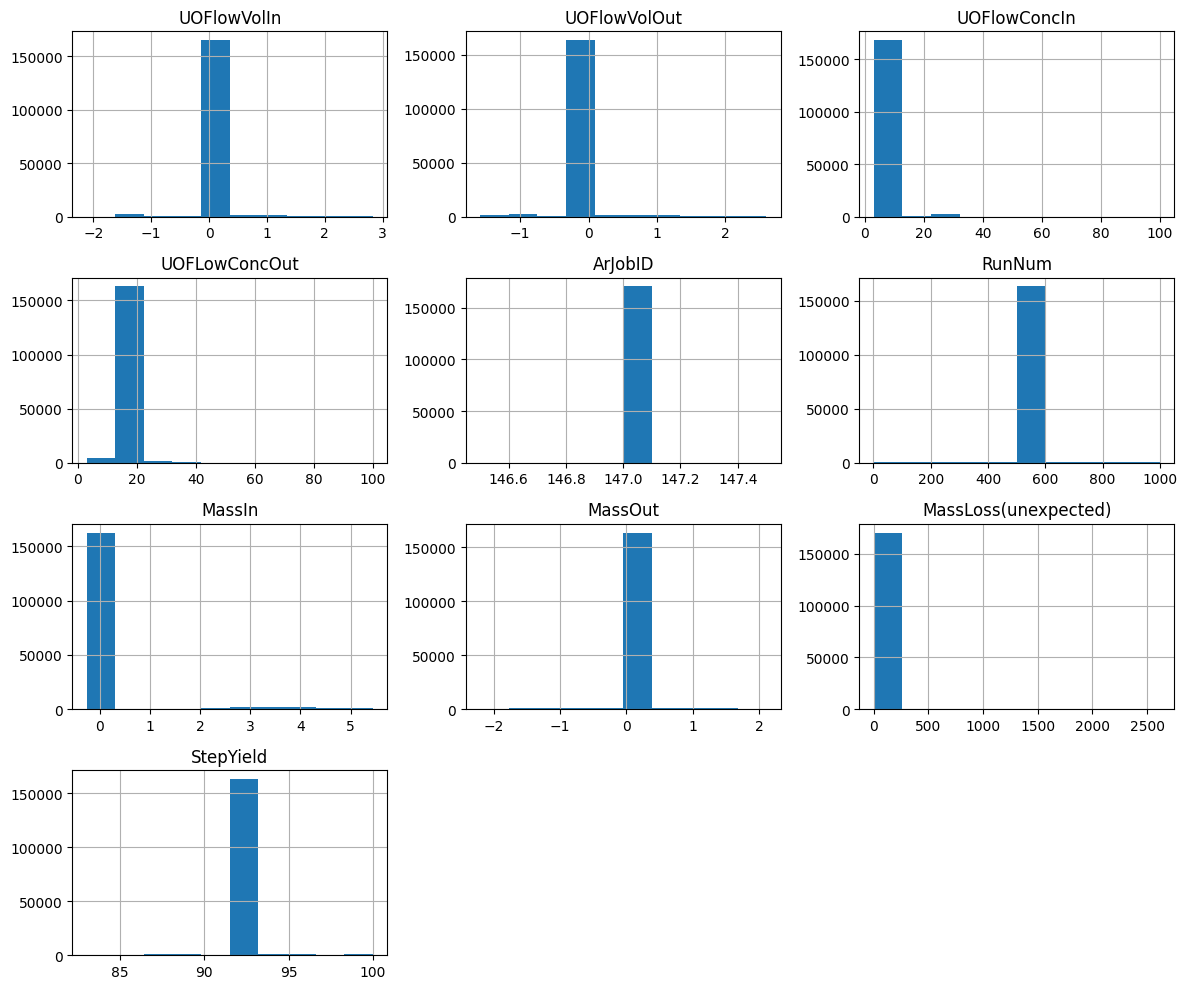

In [44]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


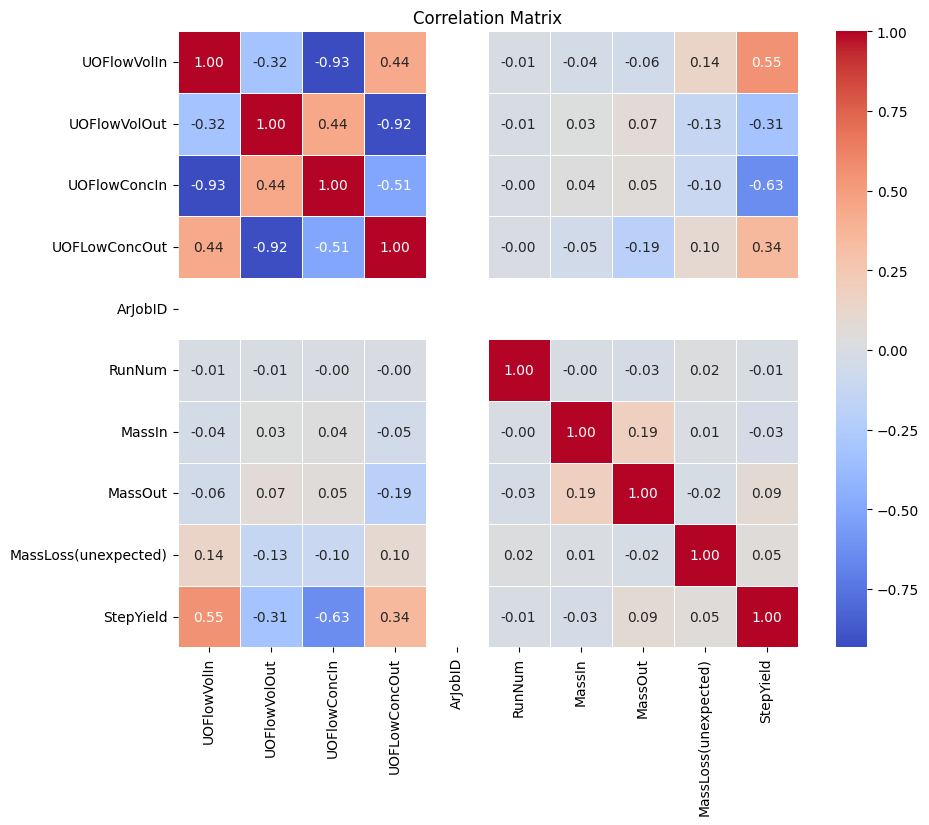

In [45]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [46]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(columns=['StepYield'])  # Features
y = df['StepYield']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [48]:
# 4. Evaluate the Model
y_pred = model.predict(X_test)



In [51]:
y_pred

array([92.68822465, 92.68822465, 92.68822465, ..., 92.67801236,
       92.68822465, 92.68822465])

In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.47790667412439936
R^2 Score: 0.4373514649082674


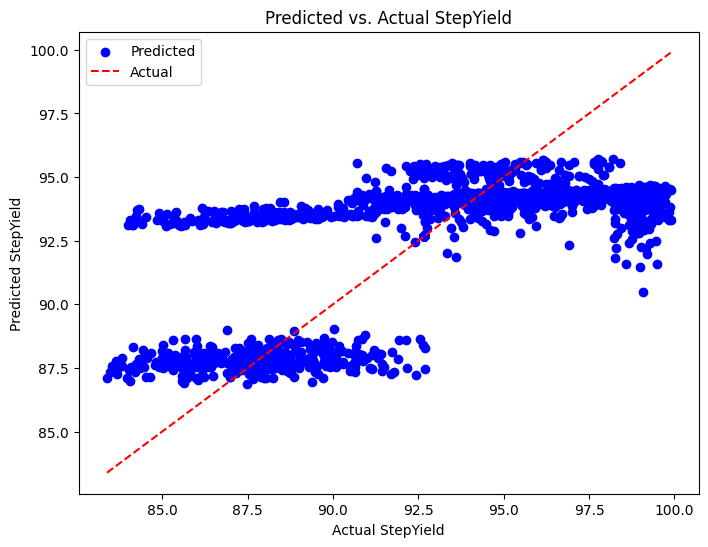

In [54]:
import numpy as np

# Plot predicted values vs. y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual StepYield')
plt.ylabel('Predicted StepYield')
plt.title('Predicted vs. Actual StepYield')
plt.legend()
plt.show()


In [55]:
import plotly.express as px

# Create a scatter plot with trendline
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual StepYield', 'y': 'Predicted StepYield'},
                 title='Predicted vs. Actual StepYield with Trendline')
fig.update_traces(marker=dict(color='blue', size=10),
                  selector=dict(mode='markers'))
fig.update_traces(line=dict(color='red', width=2),
                  selector=dict(mode='lines'))
fig.show()
